---
# $Breast Cancer Wisconsin (Diagnosis) Dataset$
### Dataset Information:
- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

---

# I. Exploring the Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()


### 1. Import Data - Breast Cancer Wisconsin (Diagnosis)

Features are computed from a digitized CT Scan image of a needle aspirate (FNA) of a breast mass. Those features describe the characteristic of the cell nuclei present in the image.

In [2]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

*Features:*
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

*The real-valued features are computed for each cell nucleus:*
1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry
10) fractal dimension ("coastline approximation" - 1)

Each of these valued feature has its own 'mean', 'standard error', and 'worst'.

<AxesSubplot:>

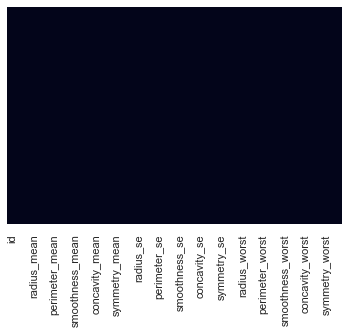

In [3]:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False)

For better work on this project, we should look at the correlation between those feature. 

In [ ]:
df = df.dropna(axis='columns')
df = df.drop('id', axis = 1)
sns.pairplot(df, hue = 'diagnosis')



### 2. Apply Principal Component Analysis (PCA)
However, we still using one of important techniques in Machine Learning for Dimensionality Reduction. Because the Feature vector in this dataset have a very large dimensions (up to 30 dimensions), and in addition the number of data points are often large. So if we perform storage and computation directly on data of this height, it will be difficult both in terms of storage and computation speed. Therefore, reducing the data dimension is an important step.

The techniques we use is call PCA, This method is based on the observation that the data are not normally distributed randomly in space but are often distributed near certain special lines/surfaces. PCA considers a special case where such special faces have linear form as subspaces.



In [5]:
X = df.drop('diagnosis', axis = 1).to_numpy()
y = df['diagnosis'].to_numpy()

#### PCA works:
step1: Standardize (center and scale) the data

step2: Compute the covariance or correlation matrix (S)

In [6]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (569, 30)
np.shape(sigma) = (30,)
np.shape(Vt) = (30, 30) 



step3: Find the Eigenvalues and orthonormal eigenvector of S

In [ ]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

---

In [7]:
df.to_csv('df_workfile.csv')  
